In [5]:
import chess
import chess.svg
import EvaluationFunctions
from copy import deepcopy
import time
from random import shuffle
import sys

In [2]:
board = chess.Board()

In [6]:
sys.getsizeof(board)

48

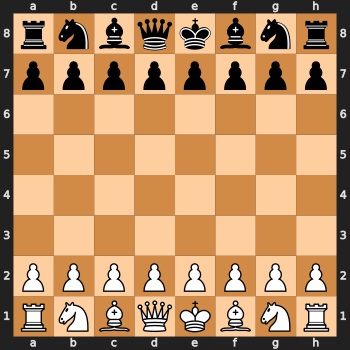

In [3]:
chess.svg.board(board, size=350)

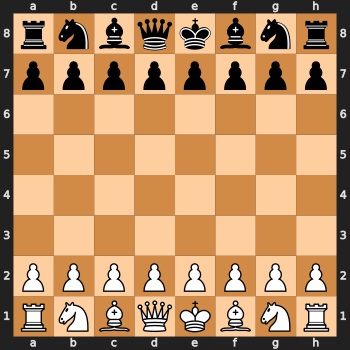

In [6]:
chess.svg.board(board, size=350)

In [7]:
board.turn = chess.WHITE

In [15]:
getPossibleMoveNums(board)

TypeError: getPossibleMoveNums() missing 1 required positional argument: 'pieceScores'

In [16]:
def getMaterialScore(theBoard, pieceScores):
    baseBoard = chess.BaseBoard(board_fen=theBoard.board_fen())
    totalScore = 0
    allPieces = baseBoard.piece_map()
    for key, value in allPieces.items():
        if(value.color == chess.WHITE):
            totalScore = totalScore+pieceScores[value.piece_type]
        else:
            totalScore = totalScore-pieceScores[value.piece_type]
    
    return totalScore

In [17]:
def getPossibleMoveNums(theBoard, pieceScores):
    theBoard.turn = chess.WHITE
    whiteLegalMoves = theBoard.legal_moves.count()
    theBoard.turn = chess.BLACK
    blackLegalMoves = theBoard.legal_moves.count()
    
    return whiteLegalMoves-blackLegalMoves

In [18]:
def getWhitePossibleMoves(theBoard):
    theBoard.turn = chess.WHITE
    return theBoard.legal_moves.count()

In [19]:
def getBlackPossibleMoves(theBoard):
    theBoard.turn = chess.BLACK
    return -1*theBoard.legal_moves.count()

In [20]:
pieceScores = {}
pieceScores[chess.PAWN] = 10
pieceScores[chess.KNIGHT] = 30
pieceScores[chess.BISHOP] = 30
pieceScores[chess.ROOK] = 50
pieceScores[chess.QUEEN] = 90
pieceScores[chess.KING] = 900
print(pieceScores)
getMaterialScore(board, pieceScores)

{1: 10, 2: 30, 3: 30, 4: 50, 5: 90, 6: 900}


0

In [21]:
evaluationDict = {}
evaluationDict["PieceScoring"] = {}
evaluationDict["PieceScoring"]["function"] = getMaterialScore

evaluationDict["PossibleMovesScoring"] = {}
evaluationDict["PossibleMovesScoring"]["function"] = getPossibleMoveNums

In [22]:
weightDict = {}
weightDict["PieceScoring"] = 1
weightDict["PossibleMovesScoring"] = 0.1

In [23]:
def getEvaluation(aBoard, evaluationDict, weightDict):
    if(aBoard.is_checkmate()):
        if(aBoard.turn == chess.WHITE):
            return -10000
        else:
            return 10000
    elif(aBoard.is_game_over(claim_draw=True)):
        return 0
    
    totalScore = 0
    for key, value in evaluationDict.items():
        tempScore = (value["function"](aBoard, EvaluationFunctions.getPieceScores()))*weightDict[key]
        totalScore = totalScore+tempScore
    
    return totalScore

In [24]:
getEvaluation(board, evaluationDict)

TypeError: getEvaluation() missing 1 required positional argument: 'weightDict'

In [25]:
def miniMaxMove(aBoard, maximizingPlayer, evaluationDict, alpha, beta, weightDict, depth=3):
    if (depth == 0 or aBoard.is_checkmate()):
        return getEvaluation(aBoard, evaluationDict, weightDict), None
    elif(maximizingPlayer == True):
        maxEval = -1000000
        maxMove = None
        listOfMoves = list(aBoard.legal_moves)
        shuffle(listOfMoves)
        for move in listOfMoves:
            aBoard.push(move)
            theEval, theMove = miniMaxMove(aBoard, False, evaluationDict, alpha, beta, weightDict, depth=depth-1)
            #print(theEval, move, depth, "Maximizing")
            aBoard.pop()
            if(theEval >= maxEval):
                maxEval = theEval
                maxMove = move
            alpha = max(alpha, theEval)
            if(alpha > beta):
                break
        return maxEval, maxMove
    elif(maximizingPlayer == False):
        minEval = 100000
        minMove = None
        listOfMoves = list(aBoard.legal_moves)
        shuffle(listOfMoves)
        for move in listOfMoves:
            aBoard.push(move)
            theEval, theMove = miniMaxMove(aBoard, True, evaluationDict, alpha, beta, weightDict, depth=depth-1)
            #print(theEval, move, depth, "Minimizing")
            aBoard.pop()
            if(theEval <= minEval):
                minEval = theEval
                minMove = move
                
            beta = min(beta, theEval)
            if(beta < alpha):
                #print("Breaking because move: ", move, alpha, beta)
                break
        return minEval, minMove

In [26]:
def getPossibleBoards(aBoard):
    
    moveBoardDict = {}
    
    for move in aBoard.legal_moves:
        aBoard.push(move)
        moveBoardDict[move] = deepcopy(newBoard)
        aBoard.pop()
        
    return moveBoardDict

In [31]:
board = chess.Board()

In [32]:
while(board.is_checkmate() == False):
    #white move
    start = time.time()
    currentEval, theMove = miniMaxMove(board, True, evaluationDict, -10000000, 10000000, weightDict, depth=3)
    print(currentEval)
    end = time.time()
    print("Time to calculate: ", end - start)
    board.push(theMove)
    print("White move: ", theMove)
    print()
    #black move
    currentEval, theMove = miniMaxMove(board, False, evaluationDict, -10000000, 10000000, weightDict, depth=3)
    print("Black move: ", theMove)
    board.push(theMove)
    print()

1.5
Time to calculate:  0.7529971599578857
White move:  e2e3

Black move:  e7e6

11.7
Time to calculate:  2.1710004806518555
White move:  d1g4

Black move:  d8f6

11.2
Time to calculate:  14.262001276016235
White move:  f1b5

Black move:  a7a6

11.1
Time to calculate:  13.462002515792847
White move:  b5e2

Black move:  h7h5

11.2
Time to calculate:  14.58799934387207
White move:  g4c4

Black move:  b8c6

11.9
Time to calculate:  19.362247228622437
White move:  d2d4

Black move:  f8b4

20.8
Time to calculate:  3.1960017681121826
White move:  e1f1

Black move:  d7d5

9.4
Time to calculate:  10.287363529205322
White move:  c4b3

Black move:  c8d7

23.7
Time to calculate:  6.684999227523804
White move:  b3a4

Black move:  h8h6

30.3
Time to calculate:  8.550999402999878
White move:  e3e4

Black move:  b7b5

33.1
Time to calculate:  10.038999080657959
White move:  e2b5

Black move:  f6d4

38.0
Time to calculate:  9.665999412536621
White move:  c2c3

Black move:  b4c3

39.4
Time to calculate

Black move:  e7f6

-71.2
Time to calculate:  0.020001649856567383
White move:  f4e3

Black move:  f6e7

-40.6
Time to calculate:  0.03800058364868164
White move:  e3f4

Black move:  e7e6

-71.2
Time to calculate:  0.020000457763671875
White move:  f4e3

Black move:  e6e7

-40.6
Time to calculate:  0.04000091552734375
White move:  e3d4

Black move:  e7f6

-71.2
Time to calculate:  0.026999711990356445
White move:  d4c3

Black move:  f6e7

-40.6
Time to calculate:  0.04499697685241699
White move:  c3d4

Black move:  e5f3

-40.7
Time to calculate:  0.03000020980834961
White move:  d4e3

Black move:  f3e5

-40.6
Time to calculate:  0.03300189971923828
White move:  e3f4

Black move:  e7f6

-71.2
Time to calculate:  0.020999908447265625
White move:  f4g3

Black move:  f6e7

-40.6
Time to calculate:  0.033000946044921875
White move:  g3f4

Black move:  e7e6

-71.2
Time to calculate:  0.020000219345092773
White move:  f4g3

Black move:  e6e7

-40.6
Time to calculate:  0.04699993133544922
White

AttributeError: 'NoneType' object has no attribute 'from_square'

In [87]:
getEvaluation(board, evaluationDict)

0

In [175]:
getEvaluation(board, evaluationDict)
    

{'PieceScoring': {'weight': 1, 'function': <function getMaterialScore at 0x000001E5F04AD790>}}
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
{1: 10, 2: 30, 3: 30, 4: 50, 5: 90, 6: 900}


0

In [159]:
def boardToImage(aBoard):
    baseBoard = chess.BaseBoard(board_fen=aBoard.board_fen())
    allPieces = baseBoard.piece_map()
    imageArray = []
    for i in range(0, 8):
        tempList = []
        for k in range(0, 8):
            tempList.append(0)
            
        imageArray.append(tempList)
        
    for key, value in allPieces.items():
        rowNum = key%8
        columnName = key//8
        print(key, rowNum, columnName)
        imageArray[rowNum][columnName] = piecePixelDict[value]

In [160]:
boardToImage(board)

63 7 7
62 6 7
61 5 7
60 4 7
59 3 7
58 2 7
57 1 7
56 0 7
55 7 6
54 6 6
53 5 6
52 4 6
51 3 6
50 2 6
49 1 6
48 0 6
15 7 1
14 6 1
13 5 1
12 4 1
11 3 1
10 2 1
9 1 1
8 0 1
7 7 0
6 6 0
5 5 0
4 4 0
3 3 0
2 2 0
1 1 0
0 0 0
